# Seaborn versus matplotlib

In [1]:
import matplotlib.pyplot as plt
# plt.style.use('classmethod')
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [2]:
plt.style.use('classic')

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd

In [4]:
# create some data
rng = np.random.RandomState(0)
x = np.linspace(0,10,500)
y = np.cumsum(rng.randn(500,6),0)

In [5]:
x

array([ 0.        ,  0.02004008,  0.04008016,  0.06012024,  0.08016032,
        0.1002004 ,  0.12024048,  0.14028056,  0.16032064,  0.18036072,
        0.2004008 ,  0.22044088,  0.24048096,  0.26052104,  0.28056112,
        0.3006012 ,  0.32064128,  0.34068136,  0.36072144,  0.38076152,
        0.4008016 ,  0.42084168,  0.44088176,  0.46092184,  0.48096192,
        0.501002  ,  0.52104208,  0.54108216,  0.56112224,  0.58116232,
        0.6012024 ,  0.62124248,  0.64128257,  0.66132265,  0.68136273,
        0.70140281,  0.72144289,  0.74148297,  0.76152305,  0.78156313,
        0.80160321,  0.82164329,  0.84168337,  0.86172345,  0.88176353,
        0.90180361,  0.92184369,  0.94188377,  0.96192385,  0.98196393,
        1.00200401,  1.02204409,  1.04208417,  1.06212425,  1.08216433,
        1.10220441,  1.12224449,  1.14228457,  1.16232465,  1.18236473,
        1.20240481,  1.22244489,  1.24248497,  1.26252505,  1.28256513,
        1.30260521,  1.32264529,  1.34268537,  1.36272545,  1.38

In [6]:
y

array([[  1.76405235,   0.40015721,   0.97873798,   2.2408932 ,
          1.86755799,  -0.97727788],
       [  2.71414076,   0.2488    ,   0.87551913,   2.6514917 ,
          2.01160156,   0.47699563],
       [  3.47517849,   0.37047502,   1.31938237,   2.98516603,
          3.50568063,   0.27183736],
       ...,
       [-34.82533536, -44.37245964, -32.86660099,  31.93843765,
          9.67250307,  -9.16537805],
       [-35.4875268 , -45.95006671, -33.20716103,  30.63521756,
         10.13925372,  -9.00427173],
       [-35.16749487, -43.87089005, -34.11462701,  30.44281336,
          8.92673797,  -9.08487024]])

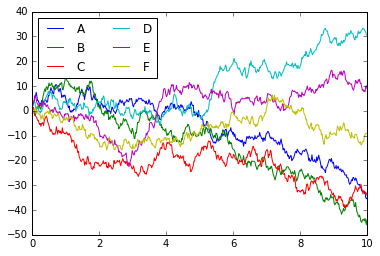

In [7]:
plt.plot(x,y)
plt.legend('ABCDEF',ncol=2,loc='upper left')

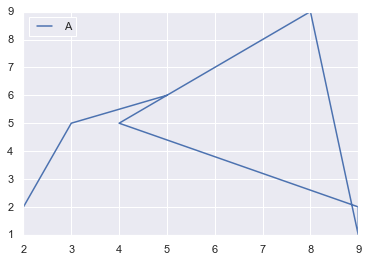

In [8]:
import seaborn as sns
sns.set()
x = [2,3,5,6,7,8,9,9,4,5]
y = [2,5,6,7,8,9,1,2,5,6]
plt.plot(x,y)
# plt.figure(figsize=(12,8))
plt.legend('ABc',loc='upper left')

# Histograms,KDE and densities

In [9]:
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]],size=2000)

In [10]:
data

array([[ 0.84800264,  0.29348938],
       [-1.27406603, -1.41121548],
       [ 1.18588018, -0.05545161],
       ...,
       [ 0.01950361, -1.4395523 ],
       [-2.10701857, -3.58069378],
       [ 0.82857025,  0.52811753]])

In [11]:
len(data)

2000

In [12]:
data.shape

(2000, 2)

In [13]:
data = pd.DataFrame(data,columns=['x','y'])

In [14]:
data

x         y
0     0.848003  0.293489
1    -1.274066 -1.411215
2     1.185880 -0.055452
3    -1.364271 -0.089909
4     0.858902  1.593298
...        ...       ...
1995  3.818035  0.268454
1996  0.052713 -0.886775
1997  0.019504 -1.439552
1998 -2.107019 -3.580694
1999  0.828570  0.528118

[2000 rows x 2 columns]

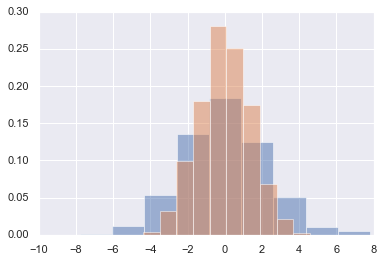

In [25]:
for col in 'xy':
    plt.hist(data[col],alpha=0.5,density=True)

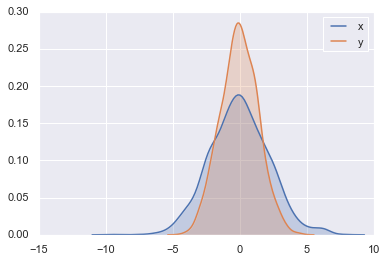

In [26]:
import seaborn as sns

for col in 'xy':
    sns.kdeplot(data[col],shade=True)
    

# Histograms and kde can be combine using distplot

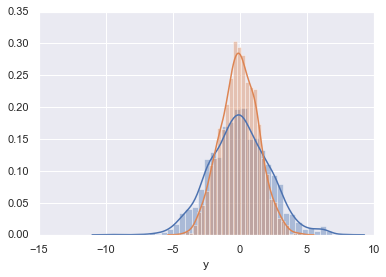

In [27]:
sns.distplot(data['x'])
sns.distplot(data['y'])

# If you pass the full data set we will get the two dimentional visualization of the data

E:\installation_files\anaconda\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


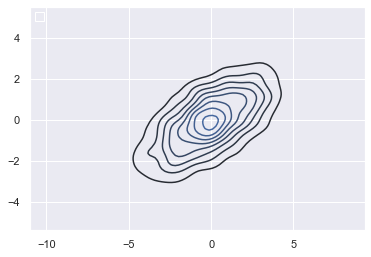

In [28]:

plt.legend('AB',loc='upper left',ncol=2)
sns.kdeplot(data)

# we can see the joint distribution and marginal distribution together by sns.jointplot

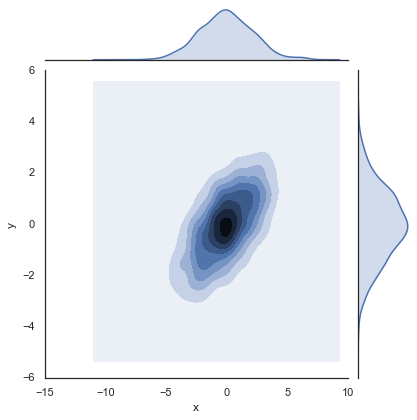

In [29]:
with sns.axes_style('white'):
    sns.jointplot('x','y',data,kind='kde')

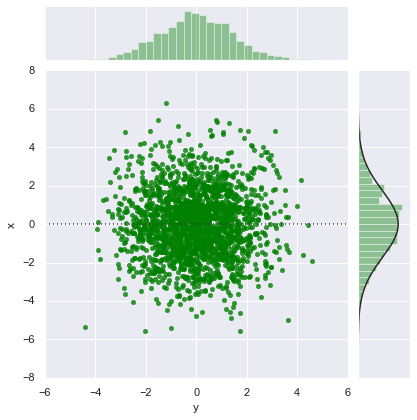

In [30]:
with sns.axes_style('darkgrid'):
    sns.jointplot('y','x',data ,kind='resid',color='green')

# Pair plots in seaborn library

**visualize the multidimentional relationships among the samples**

In [31]:
iris = sns.load_dataset('iris')

In [43]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [ ]:
dir(iris)

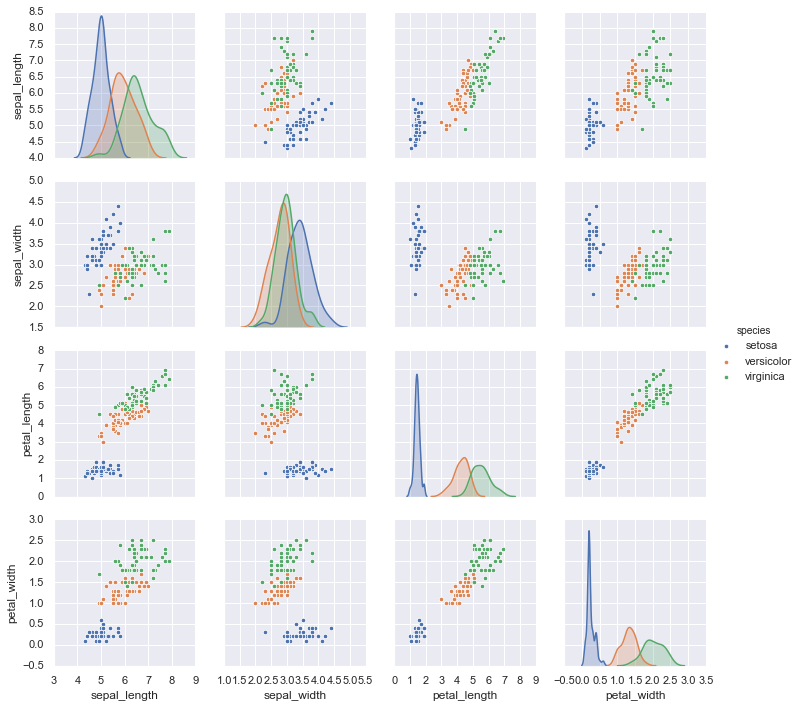

In [46]:
# sns.pairplot(iris,hue_order=['setosa','virginica','versicolor'] ,palette=['green','orange','blue'])
sns.pairplot(iris,hue='species')

# Sometimes the best way to view data is via histograms of subsets
**Seaborn facetgrid make it simple**

In [54]:
tips = sns.load_dataset('tips')
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [55]:
import pandas as pd
# tips=pd.to_csv('C:/Users/Hari/Desktop/datasets/tips1.csv',index=False)
t1 = pd.read_csv('C:/Users/Hari/Desktop/datasets/tips.csv')


In [56]:
t1.groupby(['sex']).mean()

total_bill       tip      size
sex                                   
Female   18.056897  2.833448  2.459770
Male     20.744076  3.089618  2.630573

In [58]:
tips.groupby(['time']).count()

total_bill  tip  sex  smoker  day  size
time                                           
Lunch           68   68   68      68   68    68
Dinner         176  176  176     176  176   176

In [65]:
# calculating the formula for the percentage of the tips collected over total_bill
"tips_pecentage = (tips/total_bill) * 100"


tips['tip_pct'] = tips['tip'] * 100 / tips['total_bill']



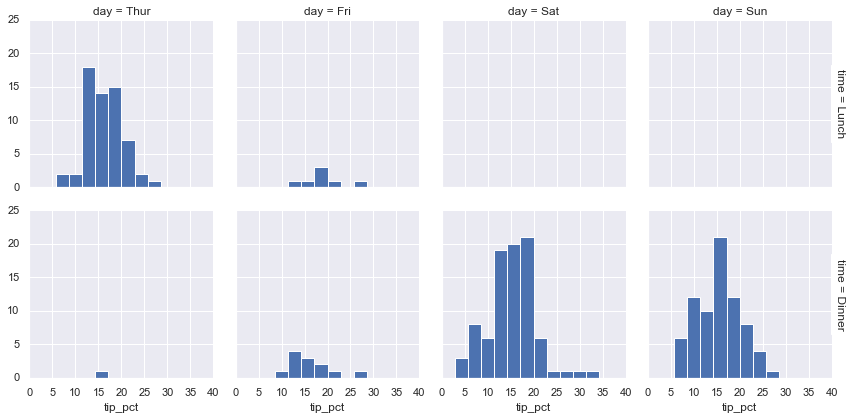

In [67]:
grid = sns.FacetGrid(tips,row='time',col='day',margin_titles=True)
grid.map(plt.hist,'tip_pct',bins = np.linspace(0,40,15))

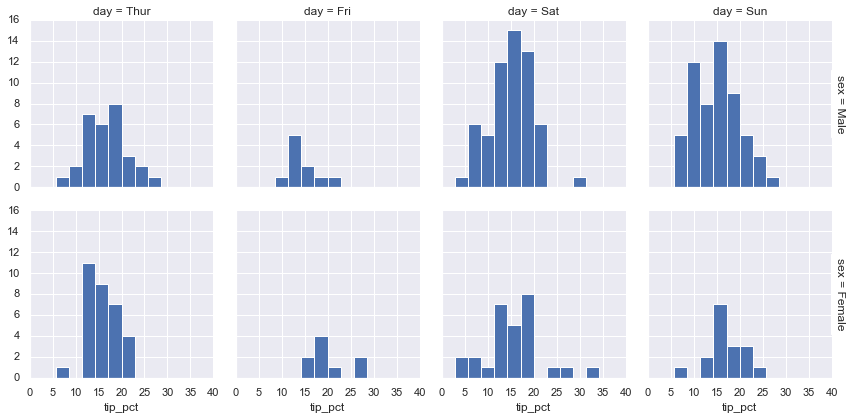

In [73]:
grid = sns.FacetGrid(tips,row='sex',col='day',margin_titles=True)
grid.map(plt.hist,'tip_pct',bins=np.linspace(0,40,15))

In [69]:
len(np.linspace(0,40,15))

15

# Factor plots
- factor plots can be usefull while ploting the subsetting datapoints over data sets
- This allow us to veiw the distribution of a parameter within bins defined by any other paramerter

E:\installation_files\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


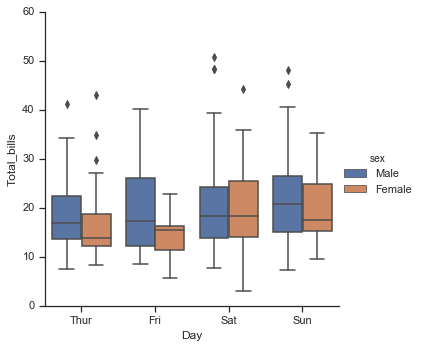

In [77]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('day','total_bill','sex',data=tips,kind='box')
    g.set_axis_labels('Day','Total_bills')

# factorplot was renamed as catplot 

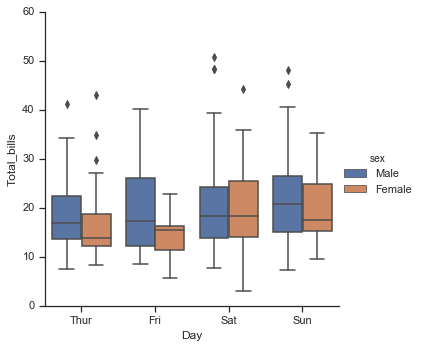

In [79]:
with sns.axes_style(style='ticks'):
    g = sns.catplot('day','total_bill','sex',data=tips,kind='box') 
# this feature similar to the tableau tool i.e representing the over ploted grapp i.e showing the parameter over graph
    g.set_axis_labels('Day','Total_bills')

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

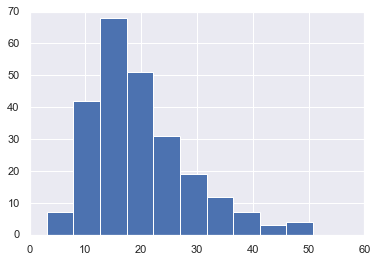

In [84]:
# sns.kdeplot(tips.total_bill,kind='line')
plt.hist(tips.total_bill)

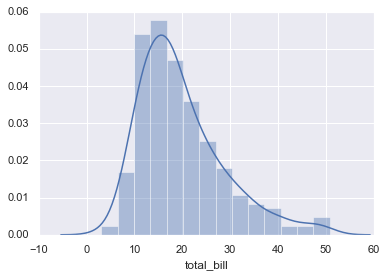

In [93]:
sns.distplot(tips.total_bill,norm_hist=True)

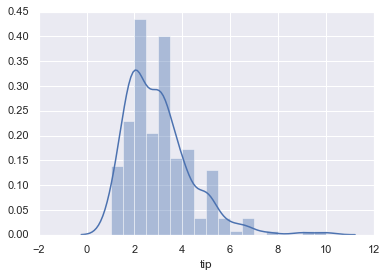

In [96]:
sns.distplot(tips.tip,norm_hist=True)

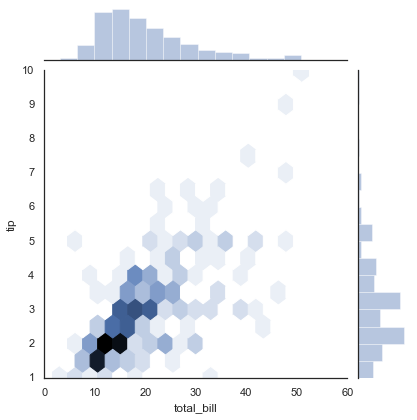

In [98]:
with sns.axes_style('white'):
    sns.jointplot('total_bill','tip',data=tips,kind='hex',)

# joint plot can even do some automatic kernel density estimatin and regress

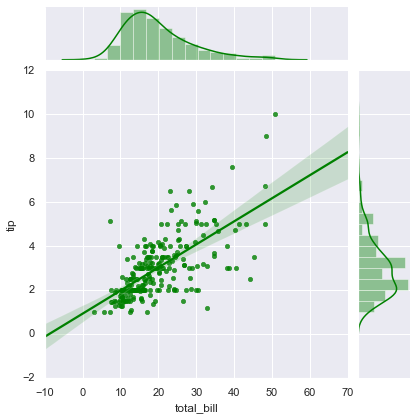

In [100]:
sns.jointplot('total_bill','tip',data=tips,kind='reg',color='green')

# bar plots

In [103]:
# planets = sns.load_dataset()
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [104]:
planets = sns.load_dataset('planets')

In [105]:
planets

method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]

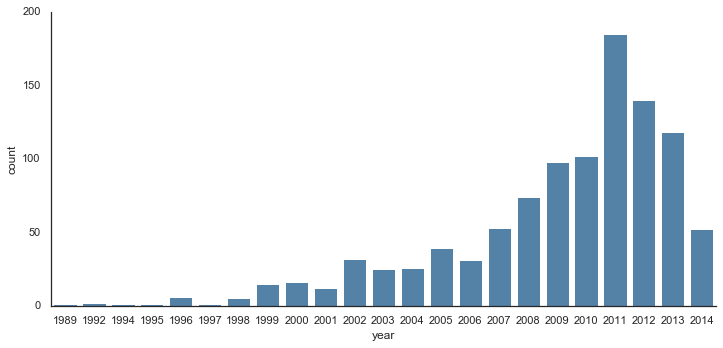

In [112]:
with sns.axes_style('white'):
    sns.catplot('year',data=planets,aspect=2,kind='count',color='steelblue')
    

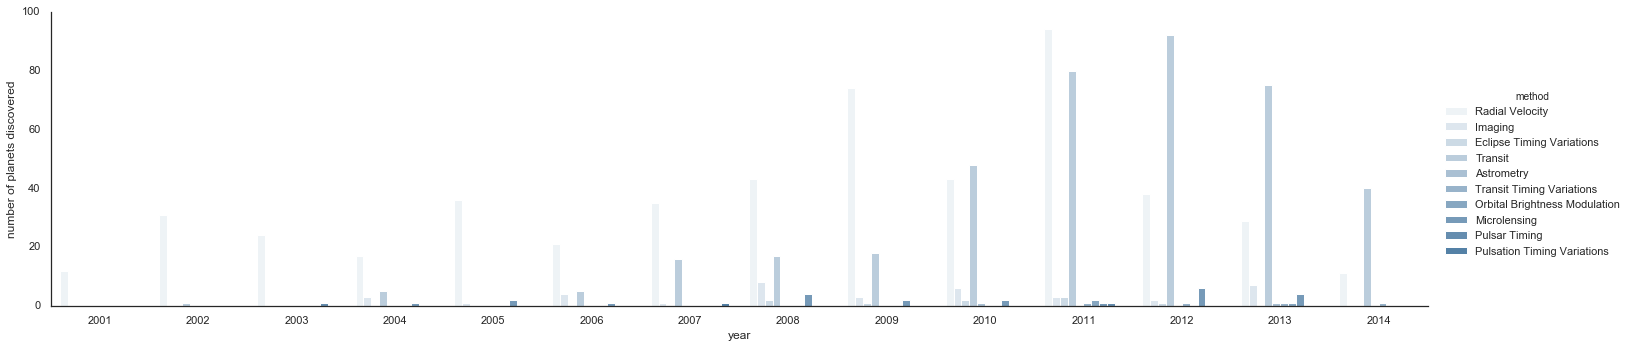

In [110]:
with sns.axes_style('white'):
    g=sns.catplot('year',data=planets,aspect=4.0,kind='count',color='steelblue',hue='method',order=range(2001,2015))
    g.set_ylabels('number of planets discovered')


# Exploring marathon finishing times

In [114]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  836k  100  836k    0     0   335k      0  0:00:02  0:00:02 --:--:--  335k


In [1]:
import pandas as pd
m_data = pd.read_csv('f://Python/Python_scripts/marathon-data.csv')

In [2]:
m_data

age gender     split     final
0       33      M  01:05:38  02:08:51
1       32      M  01:06:26  02:09:28
2       31      M  01:06:49  02:10:42
3       38      M  01:06:16  02:13:45
4       31      M  01:06:32  02:13:59
...    ...    ...       ...       ...
37245   18      M  04:24:24  09:32:57
37246   36      M  04:35:43  09:33:28
37247   51      M  04:22:35  09:33:40
37248   55      W  04:58:06  10:00:40
37249   58      W  04:59:49  10:01:08

[37250 rows x 4 columns]

In [4]:
m_data

age gender     split     final
0       33      M  01:05:38  02:08:51
1       32      M  01:06:26  02:09:28
2       31      M  01:06:49  02:10:42
3       38      M  01:06:16  02:13:45
4       31      M  01:06:32  02:13:59
...    ...    ...       ...       ...
37245   18      M  04:24:24  09:32:57
37246   36      M  04:35:43  09:33:28
37247   51      M  04:22:35  09:33:40
37248   55      W  04:58:06  10:00:40
37249   58      W  04:59:49  10:01:08

[37250 rows x 4 columns]

# asusal here by default pandsas import date as pythonstring object 

In [7]:
m_data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [45]:
def convert_time(s):
    h,m,s = map(int,s.split(':'))
    return pd.Timedelta(hours=h,minutes=m,seconds=s)

# Here in the pandas lastest pandas version datetools are repleaced with the timedelta

In [136]:
data = pd.read_csv('f:/Python/Python_scripts/marathon-data.csv',
                   converters={'split':convert_time,'final':convert_time},index_col=None);data

age gender    split    final
0       33      M 01:05:38 02:08:51
1       32      M 01:06:26 02:09:28
2       31      M 01:06:49 02:10:42
3       38      M 01:06:16 02:13:45
4       31      M 01:06:32 02:13:59
...    ...    ...      ...      ...
37245   18      M 04:24:24 09:32:57
37246   36      M 04:35:43 09:33:28
37247   51      M 04:22:35 09:33:40
37248   55      W 04:58:06 10:00:40
37249   58      W 04:59:49 10:01:08

[37250 rows x 4 columns]

In [137]:
# that looks much better for the purpose of our seaborn plotting utiles 

In [138]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [139]:
data['split_sec'] = data['split']/pd.Timedelta(1,'seconds')
data['final_sec'] = data['final']/pd.Timedelta(1,'seconds')

In [140]:
data

age gender    split    final  split_sec  final_sec
0       33      M 01:05:38 02:08:51     3938.0     7731.0
1       32      M 01:06:26 02:09:28     3986.0     7768.0
2       31      M 01:06:49 02:10:42     4009.0     7842.0
3       38      M 01:06:16 02:13:45     3976.0     8025.0
4       31      M 01:06:32 02:13:59     3992.0     8039.0
...    ...    ...      ...      ...        ...        ...
37245   18      M 04:24:24 09:32:57    15864.0    34377.0
37246   36      M 04:35:43 09:33:28    16543.0    34408.0
37247   51      M 04:22:35 09:33:40    15755.0    34420.0
37248   55      W 04:58:06 10:00:40    17886.0    36040.0
37249   58      W 04:59:49 10:01:08    17989.0    36068.0

[37250 rows x 6 columns]

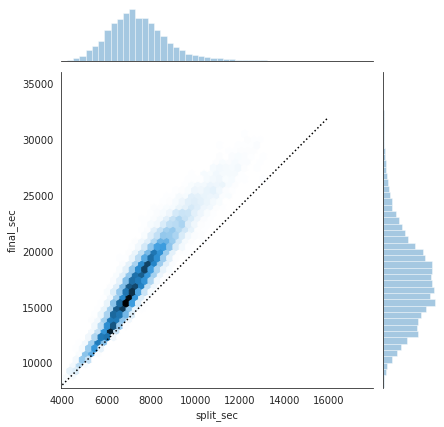

In [141]:
import seaborn as sns
import numpy as np
with sns.axes_style('white'):
    g = sns.jointplot('split_sec','final_sec',data,kind='hex')
    g.ax_joint.plot(np.linspace(4000,16000),np.linspace(8000,32000),':k')

In [142]:
" Here split is multiplied with 2 because of  its the half marathon time"
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']

In [143]:
data

age gender    split    final  split_sec  final_sec  split_frac
0       33      M 01:05:38 02:08:51     3938.0     7731.0   -0.018756
1       32      M 01:06:26 02:09:28     3986.0     7768.0   -0.026262
2       31      M 01:06:49 02:10:42     4009.0     7842.0   -0.022443
3       38      M 01:06:16 02:13:45     3976.0     8025.0    0.009097
4       31      M 01:06:32 02:13:59     3992.0     8039.0    0.006842
...    ...    ...      ...      ...        ...        ...         ...
37245   18      M 04:24:24 09:32:57    15864.0    34377.0    0.077057
37246   36      M 04:35:43 09:33:28    16543.0    34408.0    0.038421
37247   51      M 04:22:35 09:33:40    15755.0    34420.0    0.084544
37248   55      W 04:58:06 10:00:40    17886.0    36040.0    0.007436
37249   58      W 04:59:49 10:01:08    17989.0    36068.0    0.002495

[37250 rows x 7 columns]

In [144]:
data

age gender    split    final  split_sec  final_sec  split_frac
0       33      M 01:05:38 02:08:51     3938.0     7731.0   -0.018756
1       32      M 01:06:26 02:09:28     3986.0     7768.0   -0.026262
2       31      M 01:06:49 02:10:42     4009.0     7842.0   -0.022443
3       38      M 01:06:16 02:13:45     3976.0     8025.0    0.009097
4       31      M 01:06:32 02:13:59     3992.0     8039.0    0.006842
...    ...    ...      ...      ...        ...        ...         ...
37245   18      M 04:24:24 09:32:57    15864.0    34377.0    0.077057
37246   36      M 04:35:43 09:33:28    16543.0    34408.0    0.038421
37247   51      M 04:22:35 09:33:40    15755.0    34420.0    0.084544
37248   55      W 04:58:06 10:00:40    17886.0    36040.0    0.007436
37249   58      W 04:59:49 10:01:08    17989.0    36068.0    0.002495

[37250 rows x 7 columns]

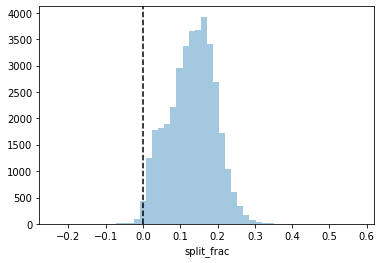

In [145]:
from matplotlib import pyplot as plt
%matplotlib inline
sns.distplot(data['split_frac'],kde=False)
plt.axvline(0,color='k',linestyle="--")
# plt.axhline(3000,color='r',linestyle='solid') # just chack featuress

In [146]:
sum(data.split_frac < 0)

251

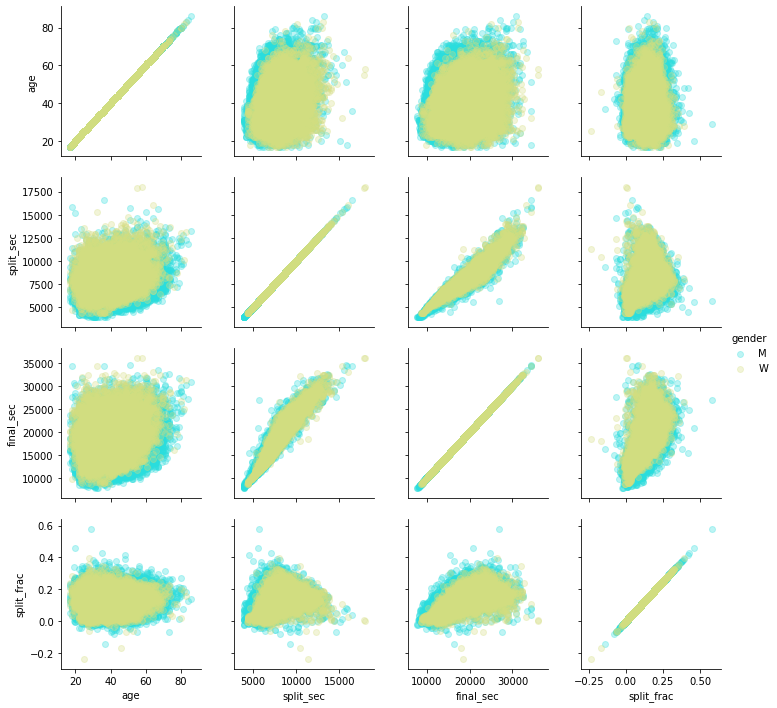

In [147]:
g = sns.PairGrid(data,vars=['age','split_sec','final_sec','split_frac'],hue='gender',palette='rainbow')
g.map(plt.scatter,alpha = 0.3)
g.add_legend()

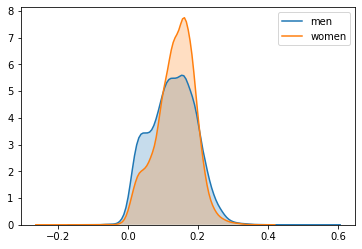

In [156]:
# the difference btween men and women here is interesting. let's look at the histograms of split fraction 
# for two groups
sns.kdeplot(data.split_frac[data.gender=='M'],label='men',shade=True)

sns.kdeplot(data.split_frac[data.gender=='W'],label='women',shade=True)

# A nice way to comapre violin plots 

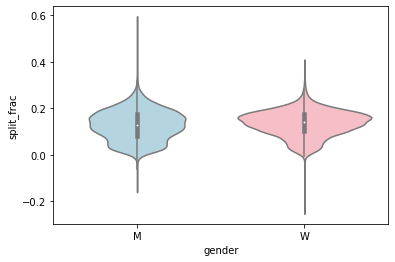

In [167]:
sns.violinplot('gender','split_frac',data=data,
               palette=['lightblue','lightpink'],orient='H')

In [168]:
# compare distribution between men and women by function as age by creating new column as age 
data['age_decade'] = data.age.map(lambda age: 10 * (age // 10))


In [169]:
data

age gender    split    final  split_sec  final_sec  split_frac  \
0       33      M 01:05:38 02:08:51     3938.0     7731.0   -0.018756   
1       32      M 01:06:26 02:09:28     3986.0     7768.0   -0.026262   
2       31      M 01:06:49 02:10:42     4009.0     7842.0   -0.022443   
3       38      M 01:06:16 02:13:45     3976.0     8025.0    0.009097   
4       31      M 01:06:32 02:13:59     3992.0     8039.0    0.006842   
...    ...    ...      ...      ...        ...        ...         ...   
37245   18      M 04:24:24 09:32:57    15864.0    34377.0    0.077057   
37246   36      M 04:35:43 09:33:28    16543.0    34408.0    0.038421   
37247   51      M 04:22:35 09:33:40    15755.0    34420.0    0.084544   
37248   55      W 04:58:06 10:00:40    17886.0    36040.0    0.007436   
37249   58      W 04:59:49 10:01:08    17989.0    36068.0    0.002495   

       age_decade  
0              30  
1              30  
2              30  
3              30  
4              30  
...           ...  
37245          10  
37246          30  
37247          50  
37248          50  
37249          50  

[37250 rows x 8 columns]

In [170]:
men = (data.gender=='M')
women = (data.gender =='F')

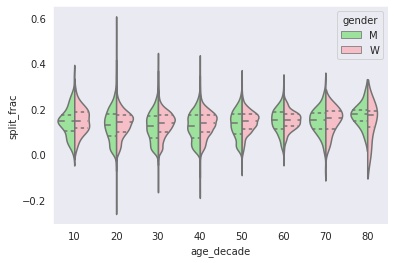

In [179]:
with sns.axes_style('dark'): 

    sns.violinplot('age_decade','split_frac',hue='gender',inner='quartile',
                    palette=['lightgreen','lightpink'],data=data,split=True)

In [180]:
(data.age > 80).sum()

7

In [181]:
# male negative splits 

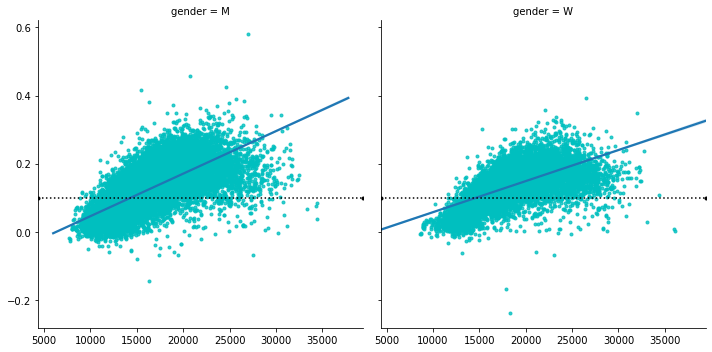

In [184]:
g = sns.lmplot('final_sec','split_frac',col='gender',data=data,
              markers='.',scatter_kws=dict(color='c'))
g.map(plt.axhline,y=0.1,color='k',ls=':')

In [187]:
titanic = sns.load_dataset('titanic')
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [189]:
# titanic.to_csv('c://Users/Hari/Desktop/datasets/titanic.csv',index=False)

# multiple plots 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
import numpy as np

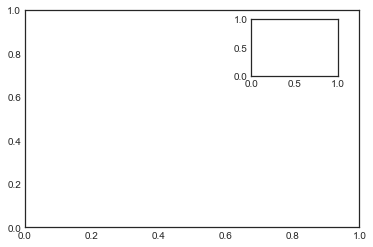

In [4]:
ax1 = plt.axes()
ax2 = plt.axes([0.65,0.65,0.2,0.2])

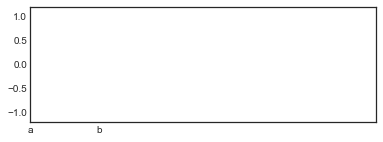

In [8]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.5,0.8,0.4],xticklabels=['a','b'],ylim=(-1.2,1.2))

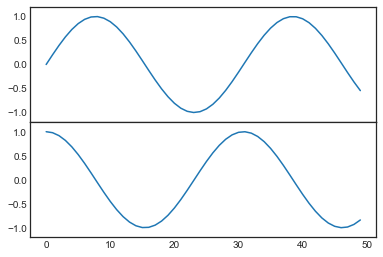

In [25]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.5,0.8,0.4],xticklabels=['a','b'],ylim=(-1.2,1.2))

ax2 = fig.add_axes([0.1,0.1,0.8,0.4],ylim=(-1.2,1.2))
x = np.linspace(0,10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))


# plt.subplot : simple grids of subplots


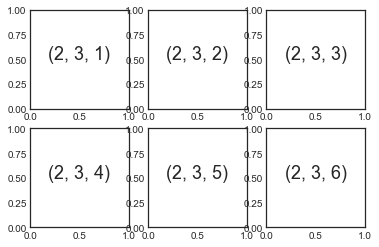

In [28]:
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,s = ((2,3,i)),fontsize=18,ha='center') # s can be replaced with str((2,3,i))

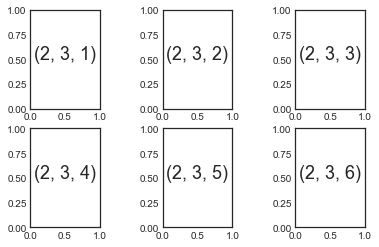

In [38]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2,wspace=0.9) # hspace is harizontal space,wspace vartical space
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.text(0.5,0.5,s = ((2,3,i)),fontsize=18,ha = 'center')

# plt.subplots: the whole grid in one go

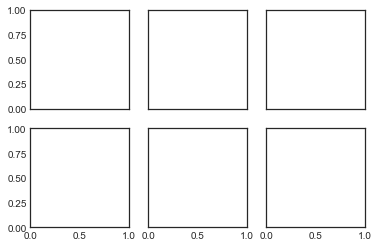

In [47]:
fig, ax = plt.subplots(2,3, sharex='col',sharey='row')

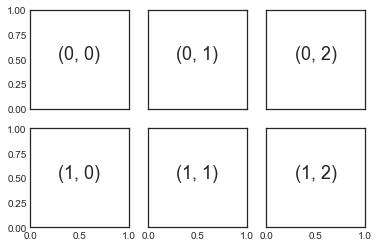

In [48]:
for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5,0.5,s = ((i,j)),fontsize=18,ha='center')
fig

# plt.gridspace: more complicated arragnements

In [50]:
grid = plt.GridSpec(2,3, wspace=0.4,hspace=0.4)

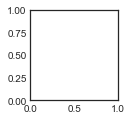

In [52]:
plt.subplot(grid[0,0])

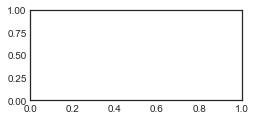

In [53]:
plt.subplot(grid[0,1:])

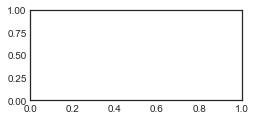

In [57]:
plt.subplot(grid[1,:2])

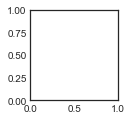

In [58]:
plt.subplot(grid[1,2])

In [63]:
# create some normally distributed data
mean = [0,0]
cov = [[1,1],[1,2]]
x,y = np.random.multivariate_normal(mean,cov,3000).T

In [64]:
x

array([-0.37299393,  0.99365241,  0.37089921, ...,  1.56619256,
        1.00229652,  1.19424373])

In [65]:
y

array([-0.08782827,  1.57051486,  0.42986644, ...,  1.38917164,
       -0.35153522,  0.1249541 ])

In [66]:
cov

[[1, 1], [1, 2]]

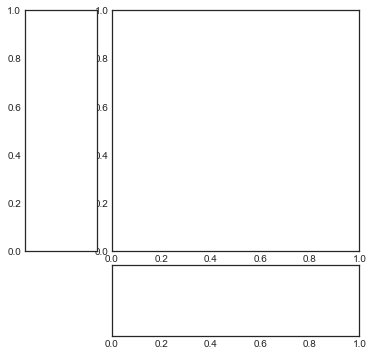

In [83]:
# set up the axes with gridspace
fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4,4 ,hspace=0.2,wspace=0.2)
main_ax = fig.add_subplot(grid[:-1,1:])
y_hist = fig.add_subplot(grid[:-1,0],xticklabels=[],sharey=main_ax)
x_hist = fig.add_subplot(grid[-1,1:],yticklabels=[],sharex=main_ax)

In [74]:
# scatter points on the main axes
main_ax.plot(x,y,'ok',markersize=3,alpha=0.2)

In [76]:
#histogram on the attached axes
x_hist.hist(x,40,histtype='stepfilled',orientation='vertical',color = 'gray')
x_hist.invert_yaxis()

In [77]:
y_hist.hist(x,40,histtype='stepfilled',orientation='vertical',color = 'gray')
y_hist.invert_xaxis()

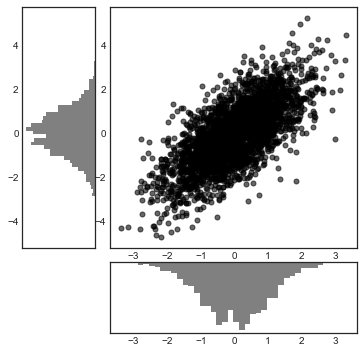

In [85]:
# set up the axes with gridspace
fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4,4 ,hspace=0.2,wspace=0.2)
main_ax = fig.add_subplot(grid[:-1,1:])
y_hist = fig.add_subplot(grid[:-1,0],xticklabels=[],sharey=main_ax)
x_hist = fig.add_subplot(grid[-1,1:],yticklabels=[],sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x,y,'ok',markersize=5,alpha=0.6)

#histogram on the attached axes
x_hist.hist(x,40,histtype='stepfilled',orientation='vertical',color = 'gray')
x_hist.invert_yaxis()

y_hist.hist(x,40,histtype='stepfilled',orientation='horizontal',color = 'gray')
y_hist.invert_xaxis()


# Text and Annotation 

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
